# [범주형자료분석팀]심현구_클린업_1주차_패키지

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import statsmodels

## Chapter 1 : Data Preprocessing & EDA
### 문제 1. R과 Python에서 각각 데이터를 불러온 뒤, 데이터의 구조를 파악하세요.

In [4]:
insur = pd.read_csv('C:/Users/mrg07/OneDrive/바탕 화면/99shimshim/SKKU/PSAT/week1/week1_package/insurance.csv')
insur.head()
insur.tail()
insur.info()
insur.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 문제2. 데이터에서 각 변수별로 unique한 값이 몇 개씩 존재하는지 파악해주세요.

In [17]:
insur.nunique(axis = 0)

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### 문제3. 문제 1과 문제 2에서 얻어낸 정보들을 바탕으로, 데이터에서 각 변수들이 범주형 변수인지 수치형 변수인지 판단해보고, 그 이유에 대해서 간략하게 서술해주세요.


In [32]:
#describe 함수에 의하면, age, bmi, children, charges는 수치형 변수이고, 나머지는 범주형 변수이다.
#describe는 수치형 자료에 대한 통계량만 출력하기 때문에 describe의 output에 나타난 변수들이 수치형 변수임을 알 수 있다.

### 문제4.  데이터 내에 결측치가 있는지 간단히 파악해보세요. 

In [31]:
insur.isnull().sum()
#logical 값의 합이 0이므로 결측치가 없다고 판단할 수 있다.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 문제5. 데이터에 있는 ‘age’ 변수를 바탕으로 ‘age_group’이라는 범주형 파생변수를 생성해주세요

In [3]:
insur['age_group'] = insur['age'].apply(lambda x : 'young' if x <= 35 else ('senior' if x <= 55 else 'elder'))
insur.head()

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,young
1,18,male,33.770,1,no,southeast,1725.55230,young
2,28,male,33.000,3,no,southeast,4449.46200,young
3,33,male,22.705,0,no,northwest,21984.47061,young
4,32,male,28.880,0,no,northwest,3866.85520,young


### 문제6. 데이터에서 수치형 변수들만을 사용하여, 수치형 변수들 간의 상관관계를 다음과 같은 상관관계 Plot을 통해 확인해주세요. 그리고 그 결과에 대해서 간단히 해석해주세요.

              age       bmi   charges
age      1.000000  0.109272  0.299008
bmi      0.109272  1.000000  0.198341
charges  0.299008  0.198341  1.000000


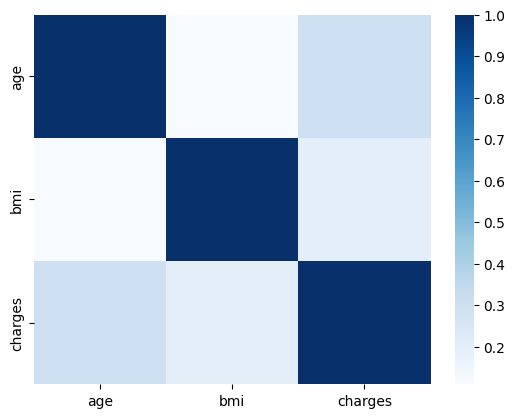

In [8]:
insur_num1 = insur.loc[:,['age','bmi','charges']]
corr1 = insur_num1.corr(method = 'pearson')

print(corr1)

graph1 = sns.heatmap(corr1, cmap = 'Blues')


###보너스문제1. 문제5에서는 수치형 변수들에 대해서만 상관관계 Plot을 그려보았지만, 범주형 자료들에 
#대해서도 상관계수를 계산할 수 있는 방법이 있습니다. 해당 방법에 대하여 조사해 본 후,
#그 내용에 대해서 간단히 요약해서 서술하고, 수치형 변수때와 마찬가지로 범주형 자료들 간의
#상관관계를 상관관계 Plot을 통해 확인해주세요.


In [5]:
from scipy.stats import chi2_contingency

aa = pd.crosstab(insur['sex'], insur['smoker'], margins = False)
result = chi2_contingency(observed = aa, correction=False)
print(result)

Chi2ContingencyResult(statistic=7.765921028604452, pvalue=0.005324114164320537, dof=1, expected_freq=array([[526.43348281, 135.56651719],
       [537.56651719, 138.43348281]]))


### 문제7. 흡연 여부(smoker)에 따른 요금(charges)의 분포를 각각 비흡연자(smoker==no), 흡연자(smoker==yes)로 나누어서 다음과 시각화해주세요. 그 후, 그려진 plot을 통해 알 수 있는 점들을 간략하게 적어주세요.

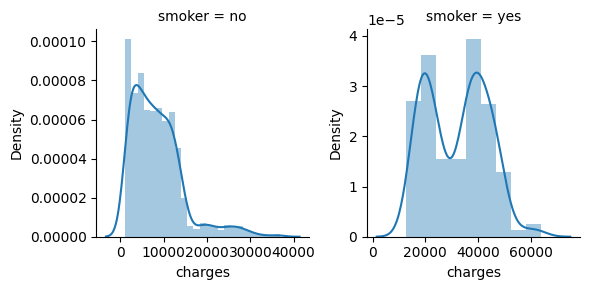

In [8]:
import warnings
warnings.filterwarnings('ignore')

facet = sns.FacetGrid(data = insur, col = 'smoker', col_order = ['no', 'yes'], sharex = False, sharey = False)

facet = facet.map(sns.distplot, 'charges')



### 문제8. 나이 그룹(age_group)에 따른 평균 요금(charge)의 차이를 확인하기 위해 박스 플롯을 그려 다음과 같이 시각화해주세요. 그 후, 그림을 통해 확인할 수 있는 점을 간략하게 적어주세요.

In [13]:
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family'] = 'NanumGothic'

Text(0.5, 1.0, '나이 그룹에 따른 평균 요금 비교')

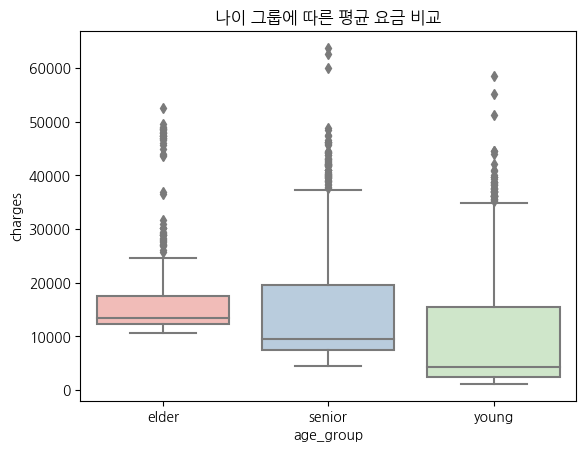

In [24]:
graph8 = sns.boxplot(data = insur, x = 'age_group', y = 'charges', palette  = 'Pastel1', order = ['elder', 'senior', 'young'])
graph8.set_title('나이 그룹에 따른 평균 요금 비교')

## Chapter 2 : ANOVA(ANalysis Of Variance, 분산분석)
### 문제1. ANOVA가 어떤 모델인지 조사해본 후, ANOVA가 어떤 모델인지에 대해서 간단히 서술해주세요.

In [2]:
#- ANOVA는 집단 간 평균에 차이가 있는 지를 검정하기 위해 사용되는 모델로, 그룹 내 분산과 그룹 간 분산의 비율인 F통계량을 이용하여 평균 차이가 통계적으로 유의미한 지 검정한다.
#데이터 사이언스에서 ANOVA는 모델학습에 가장 적합한 기능을 선택하는 데에 도움이 된다(스팸 메일 감지 등). 또, 독립변수가 목표 변수에 영향을 미치는 지 확인할 수 있게 해준다. 

#- 귀무가설: 그룹 간 평균에 차이가 없다.
#  대립가설: 그룹 간 평균에 차이가 있다.

#- 세 그룹 이상의 평균을 비교할 때는 Z나 t 검정이 아닌 ANOVA를 사용해야 한다. 왜냐하면 z나 t검정을 하려면 두 집단씩 묶어서 진행해야 하는데, 이렇게 할 경우 제 1종 오류를 범할 확률이 증가하기 때문이다. 세 그룹 간의 평균 비교를 예로 들면, 둘 씩 묶었을 때 z(또는 t)검정을 총 3번 해야 한다. 제1종오류를 0.05로 고정시키고 검정할 때, 오류를 한 번 범할 확를은 0.05지만, 세 번의 검정에서 한 번이라도 오류를 범할 확률은 1 - 0.95^3 = 0.143 으로 크게 증가하게 된다. 따라서 z나 t검정 대신 한 번에 해결할 수 있는 ANOVA를 시행하게 된다.

### 문제2. ANOVA를 사용하여 나이 그룹(age_group) 간의 평균 요금(charges) 차이가 있는지를 검정해보고, 이를 ANOVA표를 통해 검정 결과를 해석하세요.

In [64]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model2 = ols('charges ~ C(age_group)', insur).fit()
print(anova_lm(model2))

                  df        sum_sq       mean_sq          F        PR(>F)
C(age_group)     2.0  1.498926e+10  7.494631e+09  55.252143  8.826862e-24
Residual      1335.0  1.810850e+11  1.356442e+08        NaN           NaN


In [ ]:
#귀무가설: age_group간 charges 평균에 차이가 없다.
#대립가설: age_group간 charges 평균에 차이가 있다.
#제1종오류 0.05로 고정

#p-value가 0.05보다 훨씬 작으므로 95% 신뢰수준 하에서 귀무가설을 기각할 수 있다.
#즉, age_group 간에 charges 평균에 차이가 있다고 할 수 있다.

### 문제3. ANOVA를 사용하여 나이 그룹(age_group) 간의 평균 BMI 값에 차이가 있는지를 검정해보고, 이를 ANOVA표를 통해 검정 결과를 해석하세요.

In [65]:
model3 = ols('bmi ~ C(age_group)', insur).fit()
print(anova_lm(model3))

                  df        sum_sq     mean_sq         F    PR(>F)
C(age_group)     2.0    439.195123  219.597562  5.948798  0.002679
Residual      1335.0  49281.005263   36.914611       NaN       NaN


In [ ]:
#귀무가설: age_group간 bmi 평균에 차이가 없다.
#대립가설: age_group간 bmi 평균에 차이가 있다.
#제1종오류 0.05로 고정

#p-value가 0.00268로, 0.05보다 작으므로 95% 신뢰수준 하에서 귀무가설을 기각할 수 있다.
#즉, age_group 간에 bmi 평균에 차이가 있다고 할 수 있다.

### 문제4. ANOVA를 사용하여 지역(region) 간의 평균 나이(age)의 차이가 있는지를 검정해보고, 이를 ANOVA표를 통해 검정 결과를 해석하세요.

In [66]:
model4 = ols('age ~ C(region)', insur).fit()
print(anova_lm(model4))

               df         sum_sq     mean_sq         F    PR(>F)
C(region)     3.0      47.344743   15.781581  0.079782  0.970989
Residual   1334.0  263878.309219  197.809827       NaN       NaN


In [ ]:
#귀무가설: 지역간 평균 나이에 차이가 없다.
#대립가설: 지역간 평균 나이에 차이가 있다.
#제1종오류 0.05로 고정

#p-value가 0.971로, 0.05보다 크므로 95% 신뢰수준 하에서 귀무가설을 기각할 수 없다.
#즉, 지역간 평균 나이에 차이가 있다고 할 수 없다.

In [67]:
###보너스 문제2. ANOVA 또한 선형 회귀 모델과 같이 기본적인 모델의 가정이 존재할 것입니다.
#ANOVA 모델의 기본적인 가정에 대해서 살펴본 후, 이를 Plot이나 검정 등을 통해 확인 할 수 있는 방법을 찾아 설명해보세요.


#회귀분석의 가정과 비슷하게 그룹 내 데이터의 정규성, 그룹 간 독립성, 그룹 간 등분산성이 충족되어야 한다.

#정규성을 검사하기 위해서는 qq-plot을 그려서 선에 데이터가 fit하게 들어맞으면 정규성이 충족된다고 볼 수 있다.
#또, Shapiro-Wilson normality test에서 p > .05이면 정규분포에 근사한다고 할 수 있다.

#독립성은 데이터가 단순무작위표집으로 추출되었다면 대체로 만족하는 것으로 본다.

#등분산성은 Bartlett test로 확인한다. p > .05이면 집단 간 분산에 차이가 있다고 할 수 없다.

In [68]:
###보너스 문제3. ANOVA는 단순히 하나의 요인에 대한 평균 값들의 차이만을 검정할 수 있는 것이 아니라(One Way ANOVA),
#2개 이상의 요인에 대한 평균 값들의 차이에 대해서도 검정할 수 있습니다. Two Way ANOVA에 대해서 조사해본 후,
#나이 그룹(age_group)과 흡연여부(smoker)에 따라 평균 요금(charge)에 차이가 있는지 확인해보세요.


#이원배치분산분석에서는 요인이 여러개이므로 요인 간에 영향이 발생할 수 있다.
#이를 교호작용(interaction)이락 하며, 교호작용이 있으면 우리가 검정하고자 하는 주효과가 masked될 수 있으므로,
#교호작용효과가 있는 지 먼저 검정하고, 없다면 주효과를 검정하는 순서로 진행해야 한다.

#귀무가설: 교호작용 효과가 없다.
#대립가설: 교호작용 효과가 있다.
#제1종오류 0.05로 고정

model_b3 = ols('charges ~ C(age_group) * C(smoker)', insur).fit()
anova_lm(model_b3)

,df,sum_sq,mean_sq,F,PR(>F)
C(age_group),2.0,1.498926e+10,7.494631e+09,172.830083,1.849075e-67
C(smoker),1.0,1.232090e+11,1.232090e+11,2841.262866,0.000000e+00
C(age_group):C(smoker),2.0,1.149365e+08,5.746823e+07,1.325247,2.660874e-01
Residual,1332.0,5.776106e+10,4.336416e+07,NaN,NaN


In [ ]:
#multiplied term의 p-value가 0.05보다 크므로 귀무가설을 기각할 수 없다.
#즉, 교호작용 효과가 있다고 할 수 없다.
#따라서 주효과 검정을 진행한다.

#귀무가설: 나이그룹에 따라 평균요금에 차이가 없다. 흡연여부에 따라 평균요금에 차이가 없다.
#대립가설: 나이그룹에 따라 평균요금에 차이가 있다. 흡연여부에 따라 평균요금에 차이가 있다.
#제1종오류 0.05로 고정

#나이 그룹과 흡연 여부 모두 p-value가 0.05보다 작으므로 통계적으로 유의하여 귀무가설을 기각할 수 있다.
#즉, 나이그룹에 따라 평균요금에 차이가 있고, 흡연 여부에 따라서도 평균요금에 차이가 있다.